In [1]:
# Download IMDB to current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# decompress
!tar zxf aclImdb_v1.tar.gz
# delete aclImdb/train/unsup because it has no label
!rm -rf aclImdb/train/unsup
# display description of IMDB dataset
!cat aclImdb/README

'wget' is not recognized as an internal or external command,
operable program or batch file.
tar: Error opening archive: Failed to open 'aclImdb_v1.tar.gz'
'rm' is not recognized as an internal or external command,
operable program or batch file.
'cat' is not recognized as an internal or external command,
operable program or batch file.


In [10]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb_v1/aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb_v1/aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# ラベルの0,1と意味の対応の表示
print(train_review.target_names)

['neg', 'pos']


In [11]:
print("x : {}".format(x_train[0]))

x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


In [12]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
# DataFrameにまとめる
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

c:\Users\NewTech\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [14]:

vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

c:\Users\NewTech\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


In [15]:
dataset = \
['This movie is SOOOO funny!!!',
 'What a movie! I never',
'best movie ever!!!!! this movie']

In [16]:
datalist = []
for data in dataset:
    data = data.lower().replace('!', '').split(' ')
    datalist += data
clumns = list(set(datalist))

In [17]:
df1 = pd.DataFrame(index=[0, 1, 2], columns=clumns)
df1.iloc[:, :] = 0
df1

,this,i,never,best,what,movie,a,funny,soooo,is,ever
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0


In [18]:
for n, data in enumerate(dataset):
    data = data.lower().replace('!', '').split(' ')
    print(data)
    for word in data:
        df1.loc[n, word] += 1
df1

['this', 'movie', 'is', 'soooo', 'funny']
['what', 'a', 'movie', 'i', 'never']
['best', 'movie', 'ever', 'this', 'movie']


,this,i,never,best,what,movie,a,funny,soooo,is,ever
0,1,0,0,0,0,1,0,1,1,1,0
1,0,1,1,0,1,1,1,0,0,0,0
2,1,0,0,1,0,2,0,0,0,0,1


In [19]:
# 2-gram
datalist = []
for data in dataset:
    data = data.lower().replace('!', '').split(' ')
    for n in range(len(data)):
        word = data[n:n+2]
        gram = ','.join(word).replace(',', ' ')
        if len(word)!=1:
            datalist.append(gram)
clumns = list(set(datalist))

In [20]:
df2 = pd.DataFrame(index=[0, 1, 2], columns=clumns)
df2.iloc[:, :] = 0
for m, data in enumerate(dataset):
    data = data.lower().replace('!', '').split(' ')
    for n in range(len(data)):
        word = data[n:n+2]
        gram = ','.join(word).replace(',', ' ')
        print(gram)
        if len(word)!=1:
            df2.loc[m, gram] += 1
df2

this movie
movie is
is soooo
soooo funny
funny
what a
a movie
movie i
i never
never
best movie
movie ever
ever this
this movie
movie


,a movie,this movie,movie ever,what a,movie i,movie is,soooo funny,best movie,i never,is soooo,ever this
0,0,1,0,0,0,1,1,0,0,1,0
1,1,0,0,1,1,0,0,0,1,0,0
2,0,1,1,0,0,0,0,1,0,0,1


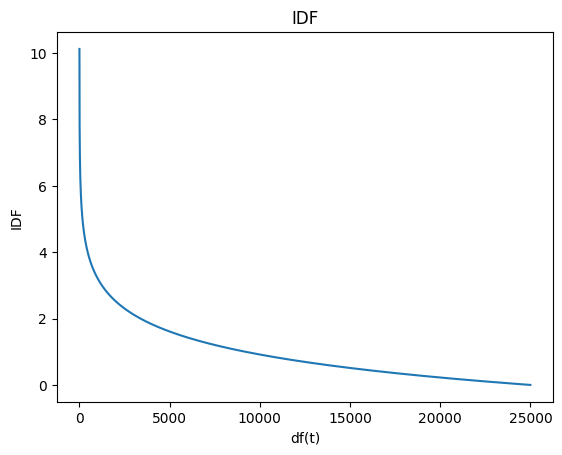

In [21]:
#TF-IDF
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

In [22]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

c:\Users\NewTech\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [24]:
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NewTech\AppData\Roaming\nltk_data...


stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

[nltk_data]   Unzipping corpora\stopwords.zip.


Problem 2

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [26]:
vectorizer = TfidfVectorizer(stop_words=stop_words, max_features=5000, token_pattern=r'(?u)\b\w+\b')
X_train = vectorizer.fit_transform(x_train)
X_test = vectorizer.fit_transform(x_test)
print(X_train.shape)
print(X_test.shape)

(25000, 5000)
(25000, 5000)


In [27]:
X_train[0]

<1x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 51 stored elements in Compressed Sparse Row format>

In [28]:
X_train[0].toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

Problem 3

In [29]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
dt.score(X_test, y_test)

0.52748

In [32]:
vectorizer_train = TfidfVectorizer(stop_words=stop_words, max_features=5000, token_pattern=r'(?u)\b\w+\b')
X_train = vectorizer_train.fit_transform(x_train)
# test
vocab = vectorizer_train.vocabulary_
vectorizer_test = TfidfVectorizer(stop_words=stop_words, max_features=5000, token_pattern=r'(?u)\b\w+\b', vocabulary=vocab)
X_test = vectorizer_test.fit_transform(x_test)
# learn
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt.score(X_test, y_test)

0.71252

In [33]:
dt = DecisionTreeClassifier()
dt.fit(X_train.toarray(), y_train)
dt.score(X_test.toarray(), y_test)

0.71068

Problem 4

Write a program that requires the following 3 sentences of TF-IDF without using scikit-learn. Create two types of formulas: standard formulas and formulas adopted by scikit-learn. No normalization is required.

In [34]:
dataset

['This movie is SOOOO funny!!!',
 'What a movie! I never',
 'best movie ever!!!!! this movie']

In [35]:
df1

,this,i,never,best,what,movie,a,funny,soooo,is,ever
0,1,0,0,0,0,1,0,1,1,1,0
1,0,1,1,0,1,1,1,0,0,0,0
2,1,0,0,1,0,2,0,0,0,0,1


In [36]:
df_sum = df1.sum(axis=1)
f_tf = lambda x: x / df_sum
tf = df1.apply(f_tf)
tf

,this,i,never,best,what,movie,a,funny,soooo,is,ever
0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.2,0.2,0.2,0.0
1,0.0,0.2,0.2,0.0,0.2,0.2,0.2,0.0,0.0,0.0,0.0
2,0.2,0.0,0.0,0.2,0.0,0.4,0.0,0.0,0.0,0.0,0.2


In [41]:
idf = len(df1.index)/df1.sum(axis=0)
idf = np.log(idf.astype('float'))
idf

this     0.405465
i        1.098612
never    1.098612
best     1.098612
what     1.098612
movie   -0.287682
a        1.098612
funny    1.098612
soooo    1.098612
is       1.098612
ever     1.098612
dtype: float64

In [42]:
tf_idf = tf*idf
tf_idf

,this,i,never,best,what,movie,a,funny,soooo,is,ever
0,0.081093,0.0,0.0,0.0,0.0,-0.057536,0.0,0.219722,0.219722,0.219722,0.0
1,0.0,0.219722,0.219722,0.0,0.219722,-0.057536,0.219722,0.0,0.0,0.0,0.0
2,0.081093,0.0,0.0,0.219722,0.0,-0.115073,0.0,0.0,0.0,0.0,0.219722


In [43]:
tf = df1
tf

,this,i,never,best,what,movie,a,funny,soooo,is,ever
0,1,0,0,0,0,1,0,1,1,1,0
1,0,1,1,0,1,1,1,0,0,0,0
2,1,0,0,1,0,2,0,0,0,0,1


In [46]:
idf = (1+len(df1.index))/(1+df1.sum(axis=0))
idf = np.log(idf.astype('float')) + 1
idf

this     1.287682
i        1.693147
never    1.693147
best     1.693147
what     1.693147
movie    0.776856
a        1.693147
funny    1.693147
soooo    1.693147
is       1.693147
ever     1.693147
dtype: float64

In [47]:
tf_idf = tf*idf
tf_idf

,this,i,never,best,what,movie,a,funny,soooo,is,ever
0,1.287682,0.0,0.0,0.0,0.0,0.776856,0.0,1.693147,1.693147,1.693147,0.0
1,0.0,1.693147,1.693147,0.0,1.693147,0.776856,1.693147,0.0,0.0,0.0,0.0
2,1.287682,0.0,0.0,1.693147,0.0,1.553713,0.0,0.0,0.0,0.0,1.693147


In [57]:
!pip install gensim==3.8.1

In [65]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, vector_size=10) # 次元数を10に設定
model.build_vocab(sentences) # 準備
model.train(sentences, total_examples=model.corpus_count, epochs=5) # 学習
print("Vocabulary list : {}".format(model.wv.index_to_key))
for vocab in model.wv.index_to_key:
    print("{} vector of : \n{}".format(vocab, model.wv[vocab]))

Vocabulary list : ['very', 'bad', 'good', 'is', 'this', 'a', 'film', 'movie']
very vector of : 
[-0.00536227  0.0023643   0.0510335   0.09009273 -0.0930295  -0.07116809
  0.06458871  0.08972988 -0.05015428 -0.03763373]
bad vector of : 
[ 0.07380505 -0.01533473 -0.04536615  0.06554051 -0.0486016  -0.01816018
  0.0287658   0.00991874 -0.08285215 -0.09448819]
good vector of : 
[ 0.07311766  0.05070262  0.06757693  0.00762866  0.06350889 -0.03405366
 -0.00946403  0.05768573 -0.07521639 -0.03936105]
is vector of : 
[-0.07511629 -0.00930048  0.09538178 -0.07319212 -0.02333784 -0.01937754
  0.08077486 -0.05930933  0.00045162 -0.04753765]
this vector of : 
[-0.0960355   0.05007293 -0.08759587 -0.04391825 -0.000351   -0.00296183
 -0.0766124   0.09614742  0.04982056  0.09233143]
a vector of : 
[-0.08157919  0.04495797 -0.04137077  0.00824535  0.08498619 -0.04462178
  0.045175   -0.06786962 -0.03548489  0.09398508]
film vector of : 
[-0.01577674  0.00321376 -0.04140681 -0.07682785 -0.01508028  0.

In [66]:
model.wv.most_similar(positive="good", topn=3)

[('movie', 0.427315354347229),
 ('bad', 0.32937222719192505),
 ('very', 0.3004249632358551)]

c:\Users\NewTech\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\NewTech\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


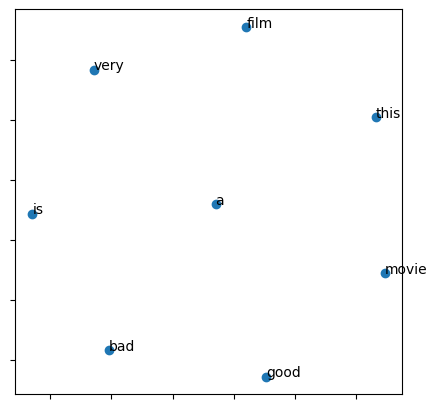

In [74]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.index_to_key
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

Problem 5

In [75]:
len(x_train)

25000

In [76]:
x_train[0]

"Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty."

In [77]:
import re

In [78]:
def pre(x):
    pattern_html = r'<br /><br />'
    pattern = r'[^a-zA-Z0-9_ ]'

    p_html = re.compile(pattern_html)
    p = re.compile(pattern)
#     result = p.sub('', text)
    result = [p_html.sub('', x[i]) for i in range(len(x))] 
    result = [p.sub('', result[i]) for i in range(len(result))] 
    return result

In [79]:
X_train = pre(x_train)
X_train[0]

'Zero Day leads you to think even rethink why two boysyoung men would do what they did  commit mutual suicide via slaughtering their classmates It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their ownmutual world via coupled destructionIt is not a perfect movie but given what moneytime the filmmaker and actors had  it is a remarkable product In terms of explaining the motives and actions of the two young suicidemurderers it is better than Elephant  in terms of being a film that gets under our rationalistic skin it is a far far better film than almost anything you are likely to see Flawed but honest with a terrible honesty'

In [80]:
datalist = []
for data in X_train:
    data = data.lower().split()
    datalist.append(data)
X_train = datalist
X_train[0]

['zero',
 'day',
 'leads',
 'you',
 'to',
 'think',
 'even',
 'rethink',
 'why',
 'two',
 'boysyoung',
 'men',
 'would',
 'do',
 'what',
 'they',
 'did',
 'commit',
 'mutual',
 'suicide',
 'via',
 'slaughtering',
 'their',
 'classmates',
 'it',
 'captures',
 'what',
 'must',
 'be',
 'beyond',
 'a',
 'bizarre',
 'mode',
 'of',
 'being',
 'for',
 'two',
 'humans',
 'who',
 'have',
 'decided',
 'to',
 'withdraw',
 'from',
 'common',
 'civility',
 'in',
 'order',
 'to',
 'define',
 'their',
 'ownmutual',
 'world',
 'via',
 'coupled',
 'destructionit',
 'is',
 'not',
 'a',
 'perfect',
 'movie',
 'but',
 'given',
 'what',
 'moneytime',
 'the',
 'filmmaker',
 'and',
 'actors',
 'had',
 'it',
 'is',
 'a',
 'remarkable',
 'product',
 'in',
 'terms',
 'of',
 'explaining',
 'the',
 'motives',
 'and',
 'actions',
 'of',
 'the',
 'two',
 'young',
 'suicidemurderers',
 'it',
 'is',
 'better',
 'than',
 'elephant',
 'in',
 'terms',
 'of',
 'being',
 'a',
 'film',
 'that',
 'gets',
 'under',
 'our',
 

In [81]:
X_test = pre(x_test)
datalist = []
for data in X_test:
    data = data.lower().split()
    datalist.append(data)
X_test = datalist
X_test[0]

['dont',
 'hate',
 'heather',
 'graham',
 'because',
 'shes',
 'beautiful',
 'hate',
 'her',
 'because',
 'shes',
 'fun',
 'to',
 'watch',
 'in',
 'this',
 'movie',
 'like',
 'the',
 'hip',
 'clothing',
 'and',
 'funky',
 'surroundings',
 'the',
 'actors',
 'in',
 'this',
 'flick',
 'work',
 'well',
 'together',
 'casey',
 'affleck',
 'is',
 'hysterical',
 'and',
 'heather',
 'graham',
 'literally',
 'lights',
 'up',
 'the',
 'screen',
 'the',
 'minor',
 'characters',
 'goran',
 'visnjic',
 'sigh',
 'and',
 'patricia',
 'velazquez',
 'are',
 'as',
 'talented',
 'as',
 'they',
 'are',
 'gorgeous',
 'congratulations',
 'miramax',
 'director',
 'lisa',
 'krueger']

Problem 6

In [84]:
# train
model = Word2Vec(min_count=1, vector_size=10) # set number of dimensions to 10
model.build_vocab(X_train) # Preparation
model.train(X_train, total_examples=model.corpus_count, epochs=5) # training

(21756060, 28595965)

In [86]:
for n, vocab in enumerate(model.wv.index_to_key):
    print("{}のベクトル : \n{}".format(vocab, model.wv[vocab]))
    if n==3:
        break

theのベクトル : 
[-1.2166756   2.1297781   2.207729    0.32745084 -0.00460996 -2.961236
 -0.98576736  1.4105564  -1.1404604  -4.4256225 ]
andのベクトル : 
[-0.3079061   1.9919728   0.75631654 -0.7091499   1.4965743  -0.87377876
 -1.0164644   3.4917812  -0.92923117 -2.8049815 ]
aのベクトル : 
[ 0.40008903  1.129405    1.167814   -0.65640897  0.1672042  -4.251715
  0.10571622  0.7876437  -2.8545916  -1.5128034 ]
ofのベクトル : 
[-0.41089565  1.0797812   0.35136184  1.0971174   1.6107533  -1.2769446
  1.4881606   1.6867183   1.6548258  -6.437506  ]


In [87]:
model2 = Word2Vec(min_count=1, vector_size=10)
model2.build_vocab(X_train)
model2.train(X_test, total_examples=model.corpus_count, epochs=5) 

(20702393, 27952320)

In [89]:
for n, vocab in enumerate(model2.wv.index_to_key):
    print("{}のベクトル : \n{}".format(vocab, model2.wv[vocab]))
    if n==3:
        break

theのベクトル : 
[-1.0486399  -2.1300638   2.8792527  -0.45371348 -0.8315589  -3.3842154
  1.3462867   2.7818017  -2.1029296   1.2739937 ]
andのベクトル : 
[-0.5318897 -1.7890385  1.6574129 -2.7753217  1.2104023 -1.354802
  1.8571507  3.045975  -1.3057334  1.4105451]
aのベクトル : 
[-1.1167929   0.10934515  2.735819   -1.9190222  -0.66224015 -3.3486903
  0.51750237  1.2466105  -3.1821132  -0.77958596]
ofのベクトル : 
[-1.7202384  -4.3143826   0.8242884  -0.9119584   0.31608114 -3.555931
  4.084541    2.9085243   0.2241574  -0.90407526]


Problem 7

c:\Users\NewTech\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
c:\Users\NewTech\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


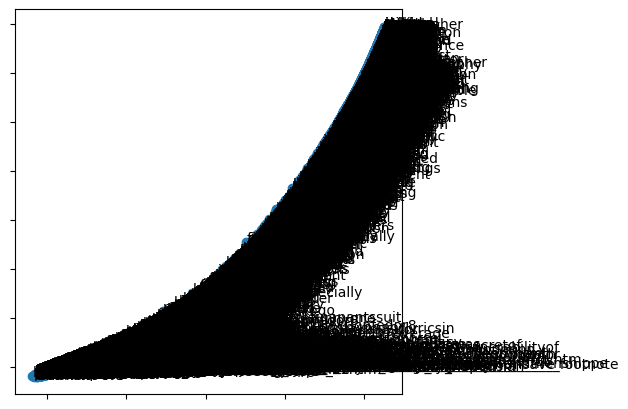

In [92]:
vocabs = model.wv.index_to_key
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=250, random_state=23)
vectors_tsne = tsne_model.fit_transform(model.wv[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [93]:
model.wv.most_similar(positive="good", topn=3)

[('terrible', 0.9699692130088806),
 ('bad', 0.9696249961853027),
 ('awful', 0.9545750617980957)]